In [2]:
import pandas as pd
from prophet import Prophet

In [3]:
df = pd.read_csv('datasets/data_car_crash_modena.csv')
df.head()

,ds,y
0,2012-01-31,432
1,2012-02-29,390
2,2012-03-31,461
3,2012-04-30,508
4,2012-05-31,606


In [4]:
m = Prophet()
m.fit(df)

11:15:09 - cmdstanpy - INFO - Chain [1] start processing
11:15:09 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
504,2024-12-26
505,2024-12-27
506,2024-12-28
507,2024-12-29
508,2024-12-30


In [6]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
504,2024-12-26,16.991678,-10.234587,44.855958
505,2024-12-27,26.441950,-1.646233,54.550866
506,2024-12-28,35.949041,6.736714,63.691975
507,2024-12-29,45.221130,15.354861,73.088618
508,2024-12-30,53.969972,24.474002,82.370100


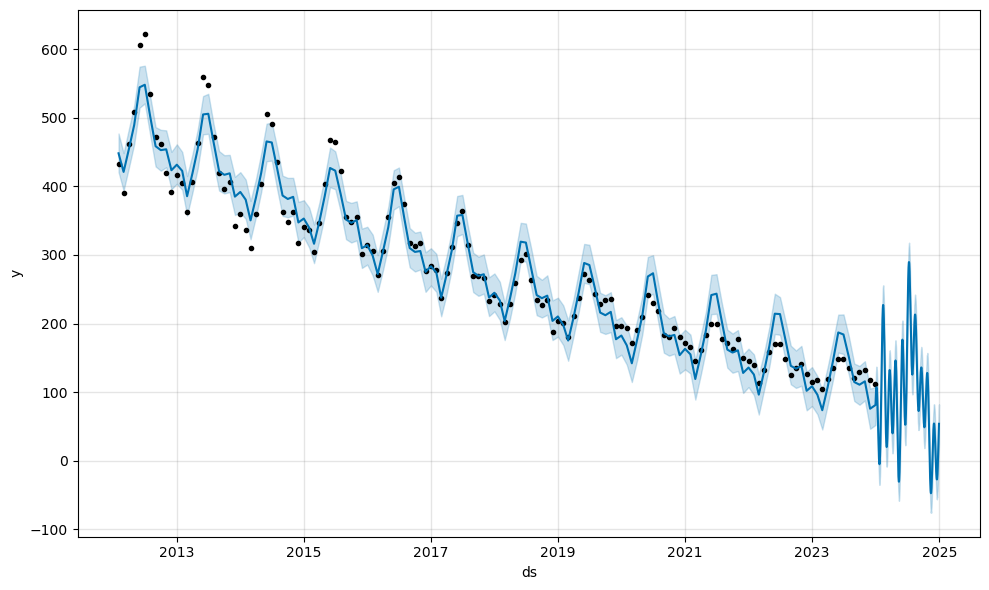

In [7]:
fig1 = m.plot(forecast)

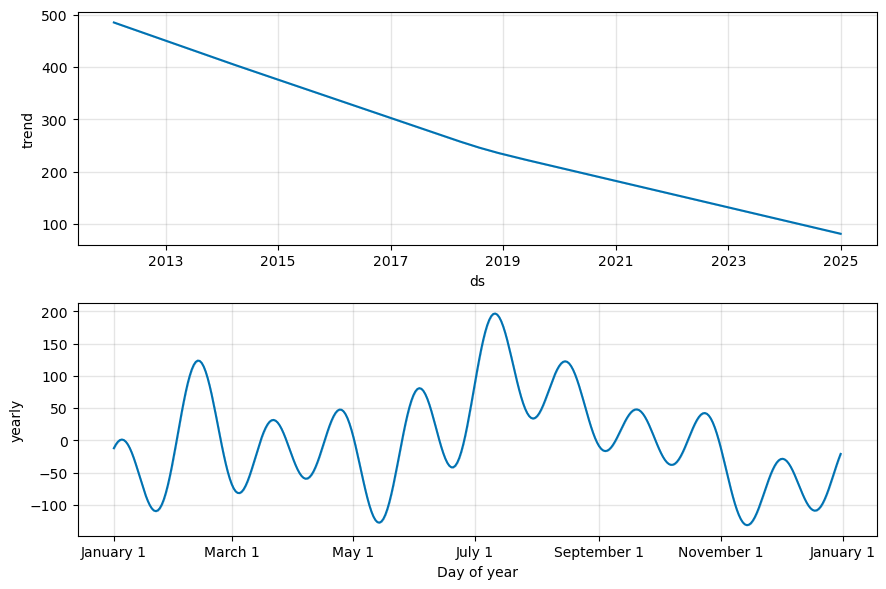

In [8]:
fig2 = m.plot_components(forecast)

In [22]:
m = Prophet(mcmc_samples=140)
forecast = m.fit(df, show_progress=False).predict(future)

11:18:11 - cmdstanpy - INFO - CmdStan start processing
11:18:11 - cmdstanpy - INFO - Chain [1] start processing
11:18:11 - cmdstanpy - INFO - Chain [2] start processing
11:18:11 - cmdstanpy - INFO - Chain [3] start processing
11:18:11 - cmdstanpy - INFO - Chain [4] start processing
11:18:12 - cmdstanpy - INFO - Chain [2] done processing
11:18:12 - cmdstanpy - INFO - Chain [1] done processing
11:18:12 - cmdstanpy - INFO - Chain [4] done processing
11:18:12 - cmdstanpy - INFO - Chain [3] done processing
11:18:12 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, co

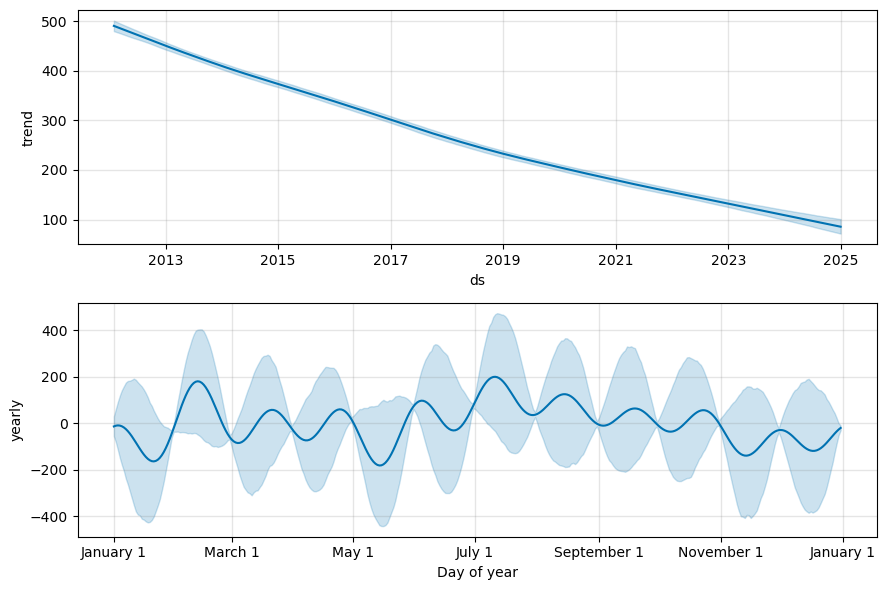

In [21]:
fig = m.plot_components(forecast)